In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#No 1

## Read and preview data

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/nba.csv')

In [3]:
# Preview the dataset
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


The last row seems to just contain null values

In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


We can see we have 9 columns and 458 rows. Some columns have missing values.
The columns are catergorical: and others are numerical

In [5]:
# Lets get the columns
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [6]:
# Lets describe our data
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


## Data cleaning

In [7]:
# We will change the columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'team', 'number', 'position', 'age', 'height', 'weight',
       'college', 'salary'],
      dtype='object')

In [8]:
# We shall check the number of unique values in each column
df.nunique()

name        457
team         30
number       53
position      5
age          22
height       18
weight       87
college     118
salary      309
dtype: int64

In [9]:
# Check for the missing values in each column
df.isnull().sum()

name         1
team         1
number       1
position     1
age          1
height       1
weight       1
college     85
salary      12
dtype: int64

In [10]:
# We can check for the proportion of missing values
df.isna().mean()

name        0.002183
team        0.002183
number      0.002183
position    0.002183
age         0.002183
height      0.002183
weight      0.002183
college     0.185590
salary      0.026201
dtype: float64

The college column has ~ about 19% null values. This is a significant proportion

In [11]:
# Lets get the rows which have missing data
df[df.isnull().any(axis=1)]

,name,team,number,position,age,height,weight,college,salary
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44.0,SG,27.0,6-8,216.0,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10.0,SG,22.0,6-7,208.0,NaN,1599840.0
...,...,...,...,...,...,...,...,...,...
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


- There is a row with missing values: index 457, which we shall remove.
- We shall impute missing values in the college column with 'No college' value to denote no college was provided.
- In the salary column, we shall leave the null values blank, for further analysis. But we shall mark this column

In [12]:
# Drop the row
df.dropna(axis=0, how= 'all', inplace=True)
df

,name,team,number,position,age,height,weight,college,salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [13]:

# We can impute the college column with the 'No college' value
df['college'] = df['college'].fillna('No College')
df.sample(10, random_state=42)

,name,team,number,position,age,height,weight,college,salary
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6-3,200.0,Utah,250750.0
39,Kyle O'Quinn,New York Knicks,9.0,PF,26.0,6-10,250.0,Norfolk State,3750000.0
341,Goran Dragic,Miami Heat,7.0,PG,30.0,6-3,190.0,No College,14783000.0
218,O.J. Mayo,Milwaukee Bucks,3.0,SG,28.0,6-5,210.0,USC,8000000.0
155,Cristiano Felicio,Chicago Bulls,6.0,PF,23.0,6-10,275.0,No College,525093.0
199,Paul George,Indiana Pacers,13.0,SF,26.0,6-9,220.0,Fresno State,17120106.0
172,James Jones,Cleveland Cavaliers,1.0,SG,35.0,6-8,218.0,Miami (FL),947276.0
101,Paul Pierce,Los Angeles Clippers,34.0,SF,38.0,6-7,235.0,Kansas,3376000.0
403,Shabazz Muhammad,Minnesota Timberwolves,15.0,SF,23.0,6-6,223.0,UCLA,2056920.0
30,Arron Afflalo,New York Knicks,4.0,SG,30.0,6-5,210.0,UCLA,8000000.0


In [14]:
# Lets check for missing values. We expect missing values only in the salary column
df.isnull().sum()

name         0
team         0
number       0
position     0
age          0
height       0
weight       0
college      0
salary      11
dtype: int64

In [15]:
# Lets check for duplicates
df.duplicated().value_counts()

False    457
Name: count, dtype: int64

We do not have duplicates


Text(0.5, 1.0, 'NBA data boxplot')

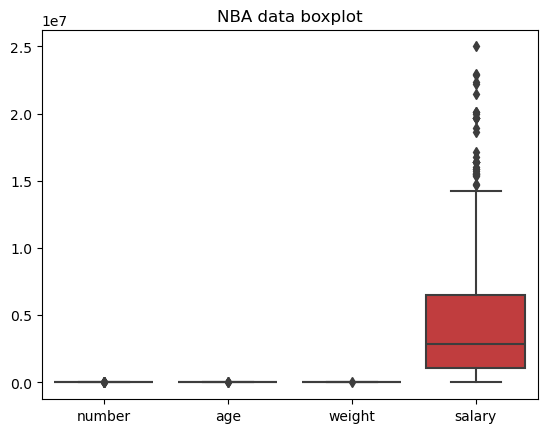

In [16]:
# Lets check for outliers. Lets plot our boxplot
# using seaborn
sns.boxplot(data=df)
plt.title('NBA data boxplot')

<Axes: >

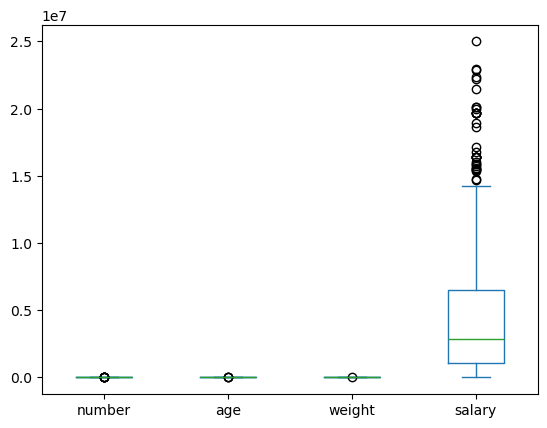

In [17]:
# Using matplotlib
df.plot(kind='box')

The salaries column contains many outliers. But given that this is a NBA dataset, we shall keep the ouliers, since they are representative of the real data.

Let us change the height column from feet to height in centimeters

In [18]:
# we shall split the height column and create new columns in feet and inches.
# The parameter expand = True allows us to split a text column into multiple columns
df[['feet','inch']] = df['height'].str.split('-',expand =True)

# Lets check our data
df

,name,team,number,position,age,height,weight,college,salary,feet,inch
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,6,2
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,6,6
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,6,5
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,6,5
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5000000.0,6,10
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,6,10
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,6,3
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,No College,900000.0,6,1
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,No College,2900000.0,7,3


In [19]:
# We check the datatypes to see if we need to convert any datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      457 non-null    object 
 1   team      457 non-null    object 
 2   number    457 non-null    float64
 3   position  457 non-null    object 
 4   age       457 non-null    float64
 5   height    457 non-null    object 
 6   weight    457 non-null    float64
 7   college   457 non-null    object 
 8   salary    446 non-null    float64
 9   feet      457 non-null    object 
 10  inch      457 non-null    object 
dtypes: float64(4), object(7)
memory usage: 42.8+ KB


In [20]:
# Let us change the feet & inch columns to integers
df['feet']=df['feet'].astype(int)
df['inch']=df['inch'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      457 non-null    object 
 1   team      457 non-null    object 
 2   number    457 non-null    float64
 3   position  457 non-null    object 
 4   age       457 non-null    float64
 5   height    457 non-null    object 
 6   weight    457 non-null    float64
 7   college   457 non-null    object 
 8   salary    446 non-null    float64
 9   feet      457 non-null    int32  
 10  inch      457 non-null    int32  
dtypes: float64(4), int32(2), object(5)
memory usage: 39.3+ KB


In [21]:
# Now, we shall calculate height in centimeters by:
# 1 ft = 30.48cm  and 1 inch = 2.54 cm
df['height_cm'] = df['feet'] * 30.48 + df['inch']*2.54
df

,name,team,number,position,age,height,weight,college,salary,feet,inch,height_cm
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,6,2,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,6,6,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,6,5,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,6,5,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5000000.0,6,10,208.28
...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,6,10,208.28
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,6,3,190.50
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,No College,900000.0,6,1,185.42
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,No College,2900000.0,7,3,220.98


<Axes: >

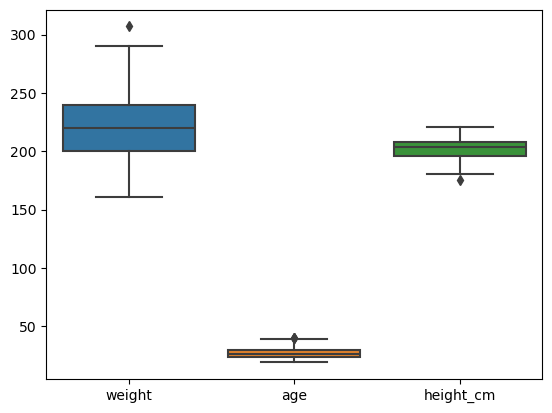

In [22]:
sns.boxplot(data = df[['weight','age','height_cm']])

In [23]:
df.sample(5, random_state=42)

,name,team,number,position,age,height,weight,college,salary,feet,inch,height_cm
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6-3,200.0,Utah,250750.0,6,3,190.50
39,Kyle O'Quinn,New York Knicks,9.0,PF,26.0,6-10,250.0,Norfolk State,3750000.0,6,10,208.28
341,Goran Dragic,Miami Heat,7.0,PG,30.0,6-3,190.0,No College,14783000.0,6,3,190.50
218,O.J. Mayo,Milwaukee Bucks,3.0,SG,28.0,6-5,210.0,USC,8000000.0,6,5,195.58
155,Cristiano Felicio,Chicago Bulls,6.0,PF,23.0,6-10,275.0,No College,525093.0,6,10,208.28


In [24]:
df = df.drop(columns= ['height','inch'])
df.sample(5, random_state=42)

,name,team,number,position,age,weight,college,salary,feet,height_cm
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,200.0,Utah,250750.0,6,190.50
39,Kyle O'Quinn,New York Knicks,9.0,PF,26.0,250.0,Norfolk State,3750000.0,6,208.28
341,Goran Dragic,Miami Heat,7.0,PG,30.0,190.0,No College,14783000.0,6,190.50
218,O.J. Mayo,Milwaukee Bucks,3.0,SG,28.0,210.0,USC,8000000.0,6,195.58
155,Cristiano Felicio,Chicago Bulls,6.0,PF,23.0,275.0,No College,525093.0,6,208.28


## Exploratory data analysis

### Univariate analysis
*-* It involves examining the distribution and characteristics of a single variable, without considering any relationships with other variables. This type of analysis focuses on summarizing and describing the main features of the data related to one variable.

In [25]:
# We shall check the statistical summaries
df.describe()

# you can use include='all' parameter

,number,age,weight,salary,feet,height_cm
count,457.000000,457.000000,457.000000,4.460000e+02,457.000000,457.000000
mean,17.678337,26.938731,221.522976,4.842684e+06,6.080963,201.143545
std,15.966090,4.404016,26.368343,5.229238e+06,0.303504,8.718404
min,0.000000,19.000000,161.000000,3.088800e+04,5.000000,175.260000
25%,5.000000,24.000000,200.000000,1.044792e+06,6.000000,195.580000
50%,13.000000,26.000000,220.000000,2.839073e+06,6.000000,203.200000
75%,25.000000,30.000000,240.000000,6.500000e+06,6.000000,208.280000
max,99.000000,40.000000,307.000000,2.500000e+07,7.000000,220.980000


- The youngest nba player is 19 yrs while the oldest is 40yrs. The average age is ~27 years.
- The tallest nba player is 2.2 metres and the shortest is 175 cm. The average league's age is 201.14

In [26]:
df.describe(include='all')

,name,team,number,position,age,weight,college,salary,feet,height_cm
count,457,457,457.000000,457,457.000000,457.000000,457,4.460000e+02,457.000000,457.000000
unique,457,30,NaN,5,NaN,NaN,119,NaN,NaN,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,NaN,No College,NaN,NaN,NaN
freq,1,19,NaN,102,NaN,NaN,84,NaN,NaN,NaN
mean,NaN,NaN,17.678337,NaN,26.938731,221.522976,NaN,4.842684e+06,6.080963,201.143545
std,NaN,NaN,15.966090,NaN,4.404016,26.368343,NaN,5.229238e+06,0.303504,8.718404
min,NaN,NaN,0.000000,NaN,19.000000,161.000000,NaN,3.088800e+04,5.000000,175.260000
25%,NaN,NaN,5.000000,NaN,24.000000,200.000000,NaN,1.044792e+06,6.000000,195.580000
50%,NaN,NaN,13.000000,NaN,26.000000,220.000000,NaN,2.839073e+06,6.000000,203.200000
75%,NaN,NaN,25.000000,NaN,30.000000,240.000000,NaN,6.500000e+06,6.000000,208.280000


In [27]:
# To calculate measures of central tendencies, we just use their functions
df['age'].mean()

26.938730853391686

In [28]:
# Median
df['age'].median()

26.0

In [29]:
df['age'].mode()

0    24.0
Name: age, dtype: float64

In [30]:
df['age'].std()

4.4040164244058335

In [31]:
df['age'].var()

19.395360666436343

#### Skewness and Kurtosis


**Skewness** is a statistical measure of asymmetric distribution of data
Skewness in statistics represents an imbalance of a normal distribution. This means that the data set has outliers or extreme values in its distribution.

In [32]:
categorical_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=[np.number])
numerical_df.skew()

number       1.668386
age          0.626349
weight       0.113788
salary       1.576321
feet         2.092152
height_cm   -0.292945
dtype: float64

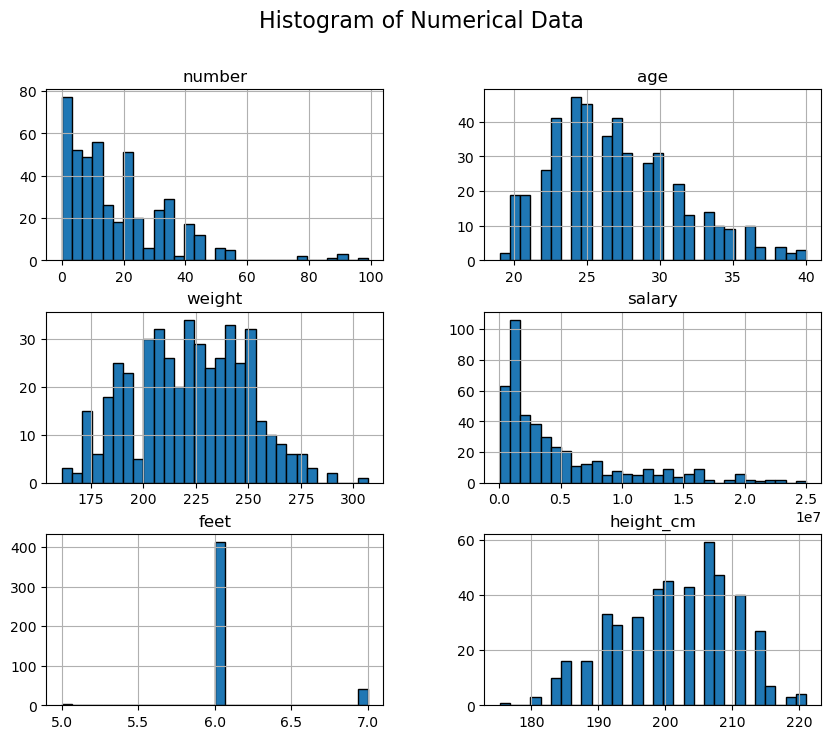

In [33]:
# We shall plot a plot with histograms

numerical_df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle('Histogram of Numerical Data', fontsize=16)
plt.show()

**Kurtosis** is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it indicates how heavy or light the tails of a distribution are compared to a normal distribution.

Here's a quick breakdown:

- Positive Kurtosis (Leptokurtic): Distributions with positive kurtosis have heavier tails than a normal distribution. This means there are more outliers.

- Negative Kurtosis (Platykurtic): Distributions with negative kurtosis have lighter tails than a normal distribution. This means there are fewer outliers.

- Zero Kurtosis (Mesokurtic): Distributions with zero kurtosis have tails similar to a normal distribution.

In [34]:
numerical_df.kurt()

number       4.364464
age         -0.051119
weight      -0.552546
salary       1.839177
feet         6.074591
height_cm   -0.524518
dtype: float64

*-* Here's a quick interpretation of these values:

- Positive Kurtosis (e.g., number, salary, feet): These columns have heavier tails than a normal distribution, indicating more outliers.

- Negative Kurtosis (e.g., weight, height_cm): These columns have lighter tails than a normal distribution, indicating fewer outliers.

- Close to Zero Kurtosis (e.g., age): This column has a tail distribution similar to a normal distribution.

**value_counts()** function returns object containing counts of unique values.


In [35]:
# Lets now calculate how many of each unique values are in the columns
team = df['team'].value_counts()
team

team
New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Boston Celtics            15
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Dallas Mavericks          15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Utah Jazz                 15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

<Axes: xlabel='team'>

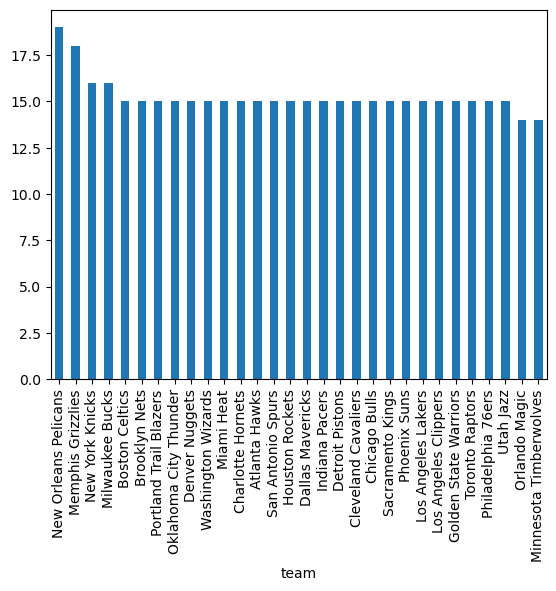

In [36]:
# Lets plot this
team.plot(kind='bar')

New Orleans Pelicans had the biggest roster with 19 players, while Memphis Grizzlies had 18. New York Knick and Milwaukee Bucks had 16 players. The rest had 15 while Orlando Magic and Minnesota Timberwolves was the thinnest with 14 players

Number

In [37]:
# We seek to check the most popular number
df['number'].value_counts().head(10)

number
5.0     23
3.0     21
0.0     20
1.0     20
8.0     19
12.0    17
11.0    17
4.0     17
9.0     16
2.0     16
Name: count, dtype: int64

Number 5, 3, 0, 1 and 8 are the most popular numbers,

In [38]:
df['number'].value_counts().tail(10)

number
16.0    2
77.0    2
54.0    1
92.0    1
39.0    1
45.0    1
99.0    1
37.0    1
52.0    1
88.0    1
Name: count, dtype: int64

The numbers [54,92,39,45,99,37,52,88] were worn only by 1 player each

Age

Text(0.5, 0, 'Age')

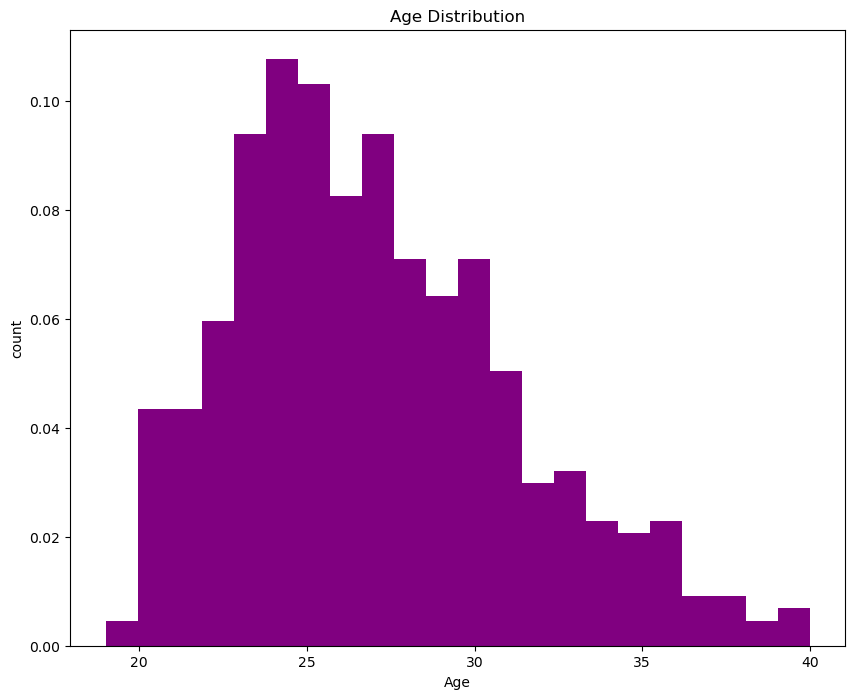

In [39]:
df['age'].hist(color = 'purple',grid=False,figsize=(10,8),bins=df['age'].nunique(),density=True)
plt.title('Age Distribution')
plt.ylabel('count')
plt.xlabel('Age')

Text(0.5, 1.0, 'Age histogram.')

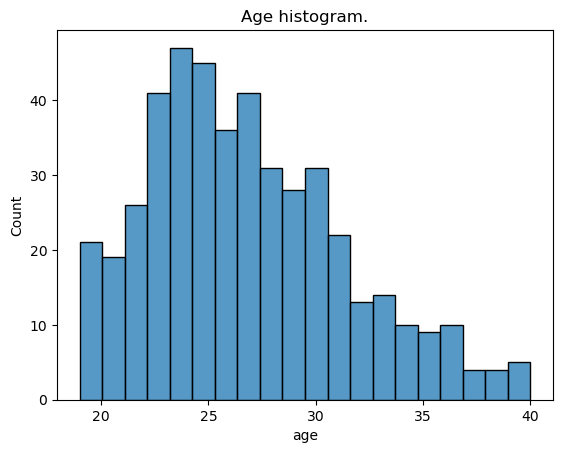

In [40]:
sns.histplot(df['age'],bins =20)
plt.title('Age histogram.')

<Axes: ylabel='Frequency'>

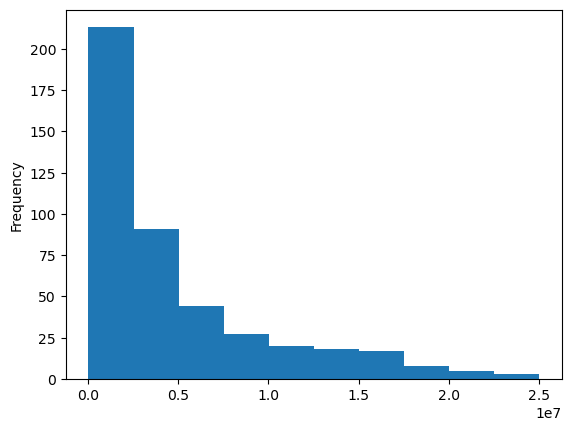

In [41]:
# Line graph
df['salary'].plot(kind='hist')

Position

In [42]:
# The number of players per position
df['position'].value_counts()

position
SG    102
PF    100
PG     92
SF     85
C      78
Name: count, dtype: int64

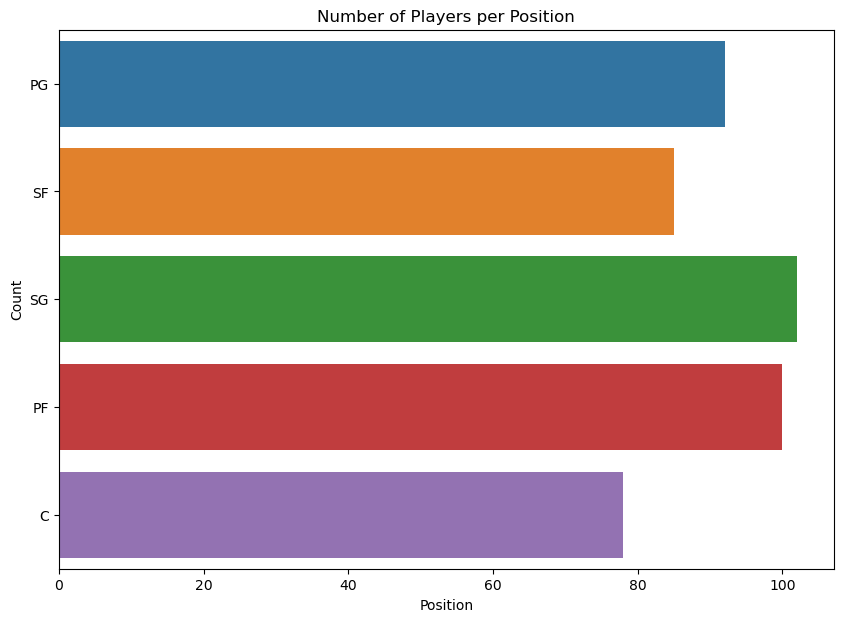

In [43]:
plt.figure(figsize=(10,7)) 
sns.countplot(y='position', data=df) 
plt.title('Number of Players per Position') 
plt.xlabel('Position') 
plt.ylabel('Count') 
plt.show()

Text(0.5, 1.0, 'position ')

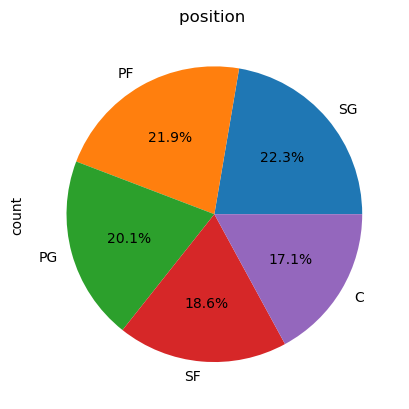

In [44]:
df['position'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.title('position ')

In [45]:
df

,name,team,number,position,age,weight,college,salary,feet,height_cm
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,6,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,6,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,NaN,6,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,6,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,No College,5000000.0,6,208.28
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,234.0,Kentucky,2239800.0,6,208.28
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,203.0,Butler,2433333.0,6,190.50
454,Raul Neto,Utah Jazz,25.0,PG,24.0,179.0,No College,900000.0,6,185.42
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,256.0,No College,2900000.0,7,220.98


<Axes: xlabel='height_cm', ylabel='weight'>

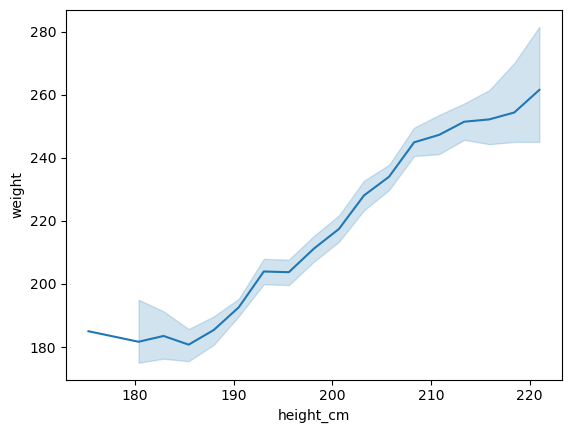

In [46]:
sns.lineplot(data=df,x=df['height_cm'],y=df['weight'])

*-* Using `crosstab` is a great way to explore the relationships between categorical variables and gain insights from your data.

*-* Using crosstab is a great way to explore the relationships between categorical variables and gain insights from your data.

In [47]:
pd.crosstab(df['team'], df['position']) 

position,C,PF,PG,SF,SG
team,,,,,
Atlanta Hawks,3,4,2,2,4
Boston Celtics,3,3,4,1,4
Brooklyn Nets,2,4,3,0,6
Charlotte Hornets,3,3,3,1,5
Chicago Bulls,2,5,2,2,4
Cleveland Cavaliers,3,2,3,2,5
Dallas Mavericks,3,4,4,2,2
Denver Nuggets,3,2,3,3,4
Detroit Pistons,3,2,4,4,2


## Bivariate analysis


`Bivariate analysis` is a statistical method used to explore the relationship between two variables. It's a way to understand how one variable might change in response to changes in another variable.

**Correlation** is the statistical summary of the relationship between variables

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

In [48]:
numerical_df.corr()

,number,age,weight,salary,feet,height_cm
number,1.000000,0.028724,0.206921,-0.112386,0.138437,0.256102
age,0.028724,1.000000,0.087183,0.213459,-0.022531,-0.008221
weight,0.206921,0.087183,1.000000,0.138321,0.393402,0.827701
salary,-0.112386,0.213459,0.138321,1.000000,0.051034,0.058792
feet,0.138437,-0.022531,0.393402,0.051034,1.000000,0.540911
height_cm,0.256102,-0.008221,0.827701,0.058792,0.540911,1.000000


**Correlation heatmaps** contain the same information in a visually appealing way. What more: they show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

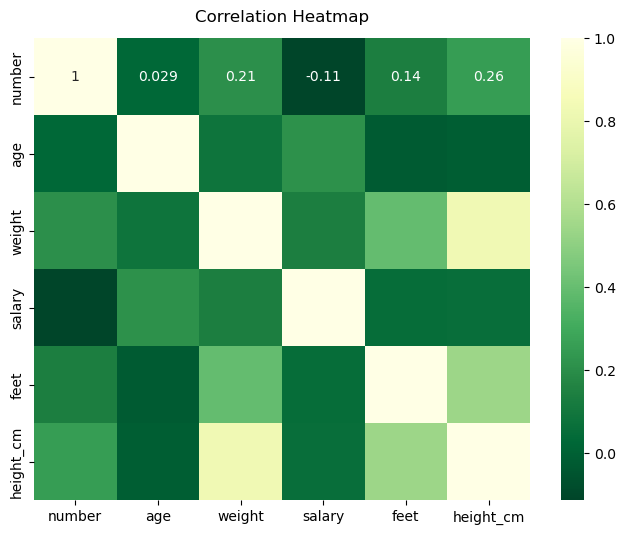

In [49]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(numerical_df.corr(),annot=True, cmap='YlGn_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

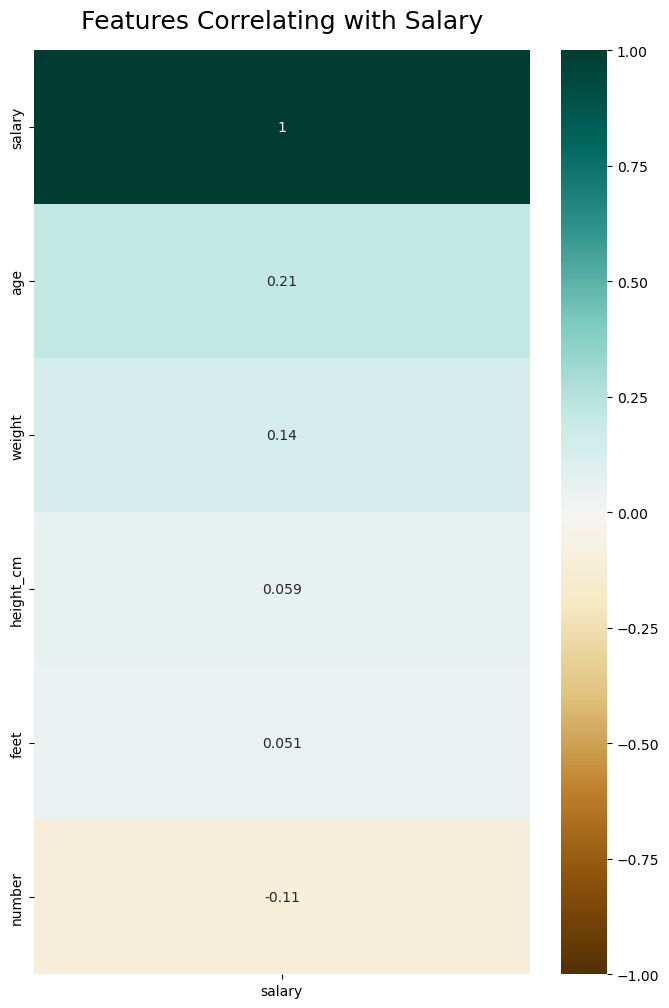

In [50]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_df.corr()[['salary']].sort_values(by='salary', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Salary', fontdict={'fontsize':18}, pad=16);

In [51]:
df.nunique()

name         457
team          30
number        53
position       5
age           22
weight        87
college      119
salary       309
feet           3
height_cm     18
dtype: int64

In [52]:
pd.crosstab(df['position'], df['feet'])

feet,5,6,7
position,,,
C,0,43,35
PF,0,94,6
PG,4,88,0
SF,0,85,0
SG,0,102,0


Pivot tables

In [53]:
x= pd.pivot_table(df.round({'salary':1}),index =['position'],columns=['feet'],
               values = ['salary'],aggfunc=[np.mean])

x# sns.heatmap(x)

mean                            
              salary                            
feet               5             6             7
position                                        
C                NaN  6.264081e+06  5.602131e+06
PF               NaN  4.552985e+06  4.706529e+06
PG        2170083.75  5.216293e+06           NaN
SF               NaN  4.857393e+06           NaN
SG               NaN  4.009861e+06           NaN

**Graphs**




Text(0.5, 1.0, 'Age vs Salary')

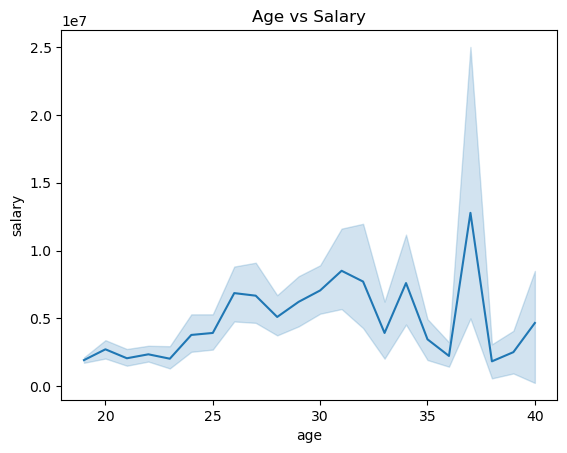

In [54]:
# lets plot a line plot of salaries against the players ages
sns.lineplot(data=df,x=df['age'],y=df['salary'])
plt.title('Age vs Salary')

<Axes: xlabel='number', ylabel='salary'>

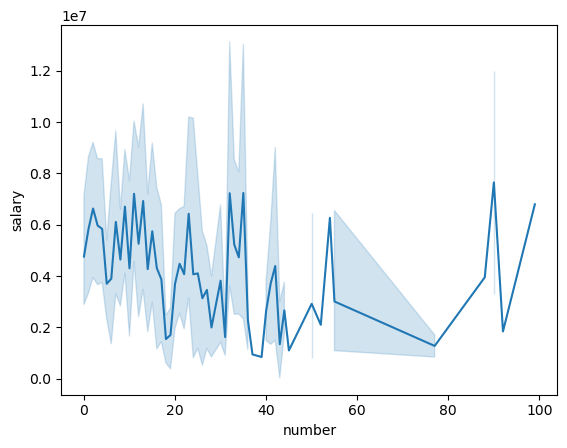

In [55]:
# lets plot a line plot of salaries against the players ages
sns.lineplot(data=df,x=df['number'],y=df['salary'])

<Axes: xlabel='height_cm', ylabel='salary'>

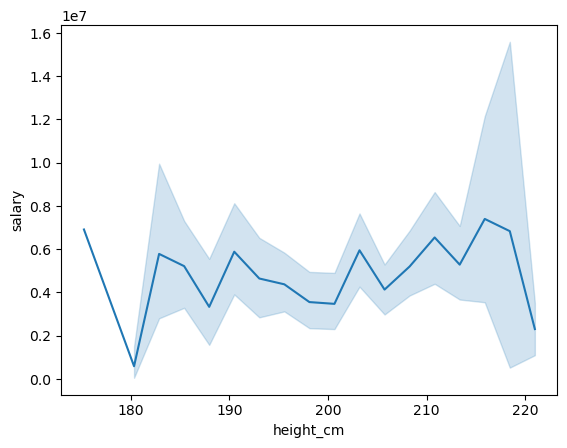

In [56]:
# lets plot a line plot of salaries against the player's heights
sns.lineplot(data=df,x=df['height_cm'],y=df['salary'])

Text(0.5, 1.0, 'Weight vs Salary')

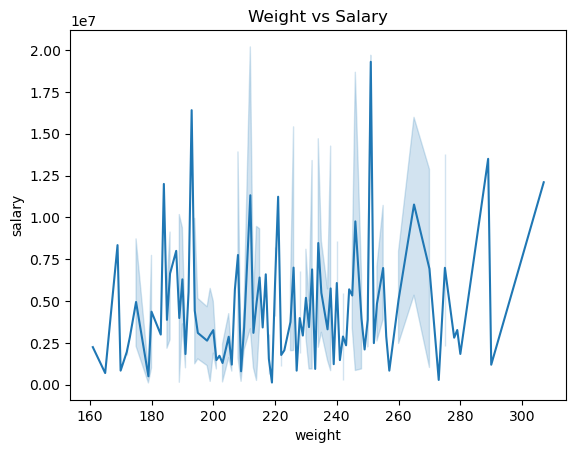

In [57]:
# lets plot a line plot of salaries against the players weights
sns.lineplot(data=df,x=df['weight'],y=df['salary'])
plt.title('Weight vs Salary')